# 전국동물보호센터정보표준데이터 살펴보기

공공데이터포털의 [표준데이터](https://www.data.go.kr/search/index.do?index=DATAGRID)에서 “동물보호센터”를 검색합니다.

전국동물보호센터정보표준데이터: <https://www.data.go.kr/dataset/15025454/standard.do>

여기서는 “CSV” 파일을 다운로드해 사용합니다.

## Matplotlib 준비

그래프를 그리기 위해 Plotting 라이브러리를 사용합니다.

<https://matplotlib.org/>

In [1]:
# matplotlib 모듈 사용

import matplotlib
import matplotlib.pyplot as plt

# matplotlib 버전 확인
# 버전이 다를 때 문제가 생기는 경우가 종종 있어서 이렇게 사용 중인 버전을 확인합니다.

matplotlib.__version__

'3.1.1'

## Pandas 준비

데이터를 다루기 위해 Pandas 라이브러리를 사용합니다.

Pandas를 사용하면 CSV 파일을 로딩하고, 컬럼 중심으로 데이터를 다룰 수 있습니다.

<https://pandas.pydata.org/>

In [2]:
# pandas 모듈 사용

import pandas as pd

# pandas 버전 확인

pd.__version__

'0.24.2'

## Folium 준비

인터랙티브한 지도를 표현하기 위해 folium 라이브러리를 사용합니다.

<https://python-visualization.github.io/folium/>

In [3]:
# folium 패키지 설치

!pip install folium

In [4]:
# folium 버전 확인

import folium

folium.__version__

'0.10.0'

In [5]:
# folium 라이브러리의 Map과 HeatMap 사용

from folium import Map
from folium.plugins import HeatMap

## Matplotlib의 한국어 표시 문제

Matplotlib을 쓰면 한국어가 제대로 표시되지 않는 문제가 있습니다.

여기서는 한국어 글꼴을 지정함으로써 이 문제를 해결하겠습니다.

In [6]:
# 임의의 점수를 만들어서 쓰기 위해 random 모듈을 사용하겠습니다.
# https://docs.python.org/3/library/random.html

import random

# 사용할 점수 목록
scores = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Accumulator
students = []

# Accumulation
for i in range(10):
    # random.choice를 쓰면 주사위 굴리기처럼 임의의 값을 하나 선택해서 쓸 수 있습니다.
    students.append({'번호': i + 1, '점수': random.choice(scores)})

# 학생 성적을 다루기 좋도록 Pandas를 씁니다.

df = pd.DataFrame(students)

df

,번호,점수
0,1,70
1,2,0
2,3,30
3,4,70
4,5,0
5,6,70
6,7,80
7,8,100
8,9,50
9,10,70


./venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
./venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
./venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 51216 missing from current font.
  font.set_text(s, 0, flags=flags)
./venv/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0, flags=flags)


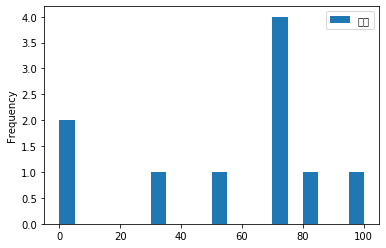

In [7]:
# 히스토그램 표시

df[['점수']].plot.hist(bins=20)

plt.show()

히스토그램 오른쪽 위에 글씨가 제대로 나오지 않는 걸 확인할 수 있습니다.

### 사용할 수 있는 글꼴 확인

시스템마다 설치된 글꼴이 다르기 때문에 먼저 우리가 쓸 수 있는 글꼴 목록을 확인하겠습니다.

In [8]:
# matplotlib에서 쓸 수 있는 ttf 글꼴 목록 중 “Gothic“이 포함된 걸 확인

import matplotlib.font_manager as fm

for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name)

AppleGothic
Apple SD Gothic Neo


### 글꼴 사용

Mac에선 “AppleGothic” 등이 보일 거고, Windows에선 “Malgun Gothic” 등이 보일 겁니다.

이 글꼴을 사용하면 됩니다.

In [9]:
# 이 부분은 바로 위에 있는 글꼴 목록을 참고해서 바꿔서 쓰세요.

plt.rcParams['font.family'] = 'AppleGothic'

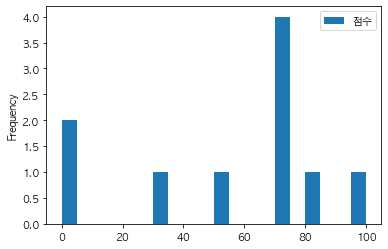

In [10]:
# 히스토그램 표시

df[['점수']].plot.hist(bins=20)

plt.show()

히스토그램 오른쪽 위에 “점수”란 글씨가 올바르게 나오는 걸 확인할 수 있습니다.

## 전국동물보호센터정보표준데이터 읽기

Pandas의 `read_csv` 함수를 이용해 CSV 파일을 읽습니다.

공공데이터는 예전에 구축한 시스템의 “EUC-KR” 인코딩을 사용하는 경우가 많습니다.

(인코딩이 맞지 않아 깨지는 건 이 글을 참고하세요: <http://openlook.org/wp/cb-1167/>)

In [11]:
# 인코딩이 맞지 않아 이걸 실패합니다.

pd.read_csv('data/animal.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 0: invalid start byte

In [12]:
# EUC-KR 인코딩으로 CSV 파일 읽기

df = pd.read_csv('data/animal.csv', encoding='euc-kr')

## 데이터 첫인상 확인

일단 데이터가 어떻게 생겼는지 확인합니다.

In [13]:
# 1. 컬럼 목록

df.columns

Index(['동물보호센터명', '관리기관명', '동물보호센터유형', '구조대상동물', '소재지도로명주소', '소재지지번주소', '위도',
       '경도', '동물보호센터지정일자', '평일운영시작시각', '평일운영종료시각', '평일분양시작시각', '평일분양종료시각',
       '주말운영시작시각', '주말운영종료시각', '주말분양시작시각', '주말분양종료시각', '휴무일', '수의사인원수',
       '사양관리사인원수', '진료실수', '사육실수', '격리실수', '사료보관실수', '구조운반용차량보유대수', '전화번호',
       '데이터기준일자', '제공기관코드', '제공기관명', 'Unnamed: 29'],
      dtype='object')

In [14]:
# 2. 전체 갯수와 컬럼 갯수 확인

df.shape

(188, 30)

In [15]:
# 3. 데이터 일부 확인

df.head()

,동물보호센터명,관리기관명,동물보호센터유형,구조대상동물,소재지도로명주소,소재지지번주소,위도,경도,동물보호센터지정일자,평일운영시작시각,...,진료실수,사육실수,격리실수,사료보관실수,구조운반용차량보유대수,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 29
0,인천수의사회 유기동물보호소,인천수의사회,법인,「동물보호법」에 따른 유실·유기동물,인천광역시 계양구 다남로165번길 56(다남동),NaN,37.566196,126.719630,2006-10-18,09:00,...,NaN,NaN,NaN,NaN,NaN,032-515-7567,2018-08-13,3520000,인천광역시 연수구,NaN
1,사단법인 한국동물구조관리협회,도봉구청,법인,유실·유기 및 피학대동물,경기도 양주시 남면 감악산로 63-37,NaN,37.870072,126.983225,2014-06-10,09:00,...,1.0,6.0,2.0,1.0,5.0,031-867-9119,2018-01-02,3090000,서울특별시 도봉구,NaN
2,수성동물병원,화성시,개인,"개, 고양이",경기도 화성시 남양읍 남양성지로34,경기도 화성시 남양읍 남양리 465-3번지,37.205577,126.807191,2016-12-31,09:00,...,1.0,2.0,1.0,1.0,2.0,031-355-5883,2017-11-17,5530000,경기도 화성시,NaN
3,청산동물병원,화성시,개인,"개, 고양이",경기도 화성시 우정읍 3.1만세로29,경기도 화성시 우정읍 조암리 348번지,37.082177,126.817192,2016-12-31,09:00,...,1.0,1.0,1.0,1.0,1.0,031-358-4358,2017-11-17,5530000,경기도 화성시,NaN
4,인천광역시수의사회유기동물보호소,인천시수의사회,단체,"유기, 유실동물",인천광역시 계양구 다남로165번길 56(다남동),인천광역시 계양구 다남동 35-8,37.566196,126.719630,2007-01-01,09:00,...,1.0,22.0,1.0,2.0,2.0,032-515-7567,2018-08-08,3530000,인천광역시 남동구,NaN


## 불필요한 컬럼 제거

결측값이 너무 많거나 당장에 필요하지 않은 컬럼을 정리합니다.

In [16]:
# 컬럼별 결측값 갯수 확인

data = df.isnull().sum()

pd.DataFrame(data)

,0
동물보호센터명,0
관리기관명,0
동물보호센터유형,0
구조대상동물,0
소재지도로명주소,4
소재지지번주소,30
위도,0
경도,0
동물보호센터지정일자,0
평일운영시작시각,0


In [17]:
# 안 쓰는 컬럼 이름을 넣어 drop해서 simple 데이터를 만듭니다.

simple_df = df.drop(columns=[
    '소재지지번주소', '동물보호센터지정일자',
    '평일운영시작시각', '평일운영종료시각', '평일분양시작시각', '평일분양종료시각',
    '주말운영시작시각', '주말운영종료시각', '주말분양시작시각', '주말분양종료시각',
    '진료실수', '사육실수', '격리실수', '사료보관실수', '구조운반용차량보유대수', '전화번호',
    '데이터기준일자', '제공기관코드', '제공기관명', 'Unnamed: 29'
])

# 정리된 데이터 확인

simple_df.head()

,동물보호센터명,관리기관명,동물보호센터유형,구조대상동물,소재지도로명주소,위도,경도,휴무일,수의사인원수,사양관리사인원수
0,인천수의사회 유기동물보호소,인천수의사회,법인,「동물보호법」에 따른 유실·유기동물,인천광역시 계양구 다남로165번길 56(다남동),37.566196,126.719630,연중무휴,1,3
1,사단법인 한국동물구조관리협회,도봉구청,법인,유실·유기 및 피학대동물,경기도 양주시 남면 감악산로 63-37,37.870072,126.983225,연중무휴,1,6
2,수성동물병원,화성시,개인,"개, 고양이",경기도 화성시 남양읍 남양성지로34,37.205577,126.807191,일요일,1,1
3,청산동물병원,화성시,개인,"개, 고양이",경기도 화성시 우정읍 3.1만세로29,37.082177,126.817192,일요일,1,2
4,인천광역시수의사회유기동물보호소,인천시수의사회,단체,"유기, 유실동물",인천광역시 계양구 다남로165번길 56(다남동),37.566196,126.719630,없음,1,3


## 기본적인 분류

데이터가 어떻게 분류되어 있는지 확인합니다.

In [18]:
# “동물보호센터유형” 컬럼에 있는 값의 갯수를 확인

data = simple_df['동물보호센터유형'].value_counts()

pd.DataFrame(data)

,동물보호센터유형
동물병원,85
법인,44
개인,32
단체,27


만약 `value_counts`를 쓰지 않고 `count`를 쓴다면 다음과 같이 해야 합니다.

In [19]:
values = simple_df['동물보호센터유형'].unique()

values

array(['법인', '개인', '단체', '동물병원'], dtype=object)

In [20]:
counts = []

for value in values:
    condition = simple_df['동물보호센터유형'] == value
    count = simple_df[condition]['동물보호센터유형'].count()
    counts.append({'동물보호센터유형': value, '갯수': count})

pd.DataFrame(counts, columns=['동물보호센터유형', '갯수'])

,동물보호센터유형,갯수
0,법인,44
1,개인,32
2,단체,27
3,동물병원,85


이렇게 하면 어떤 게 가장 많은지, 그 순서는 어떻게 되는지 따로 확인해야 합니다.

게다가 코드가 너무 길다는 것도 문제죠.

`value_counts`를 강력히 추천합니다.

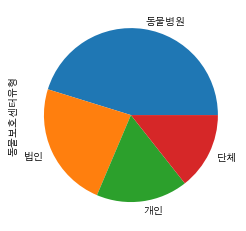

In [21]:
# 파이 그래프 표시

data = simple_df['동물보호센터유형'].value_counts()

data.plot.pie()

plt.show()

In [22]:
# 휴무일도 똑같이 처리해 봅니다.

data = simple_df['휴무일'].value_counts()

pd.DataFrame(data)

,휴무일
연중무휴,39
일요일,32
없음,22
공휴일,18
매주 일요일,6
토요일+일요일,6
일요일+공휴일,5
주말+공휴일,4
토요일+일요일+공휴일,4
탄력운영,3


In [23]:
# nlargest를 쓰면 상위권에 있는 것만 확인할 수 있습니다.

data = simple_df['휴무일'].value_counts().nlargest(10)

pd.DataFrame(data)

,휴무일
연중무휴,39
일요일,32
없음,22
공휴일,18
매주 일요일,6
토요일+일요일,6
일요일+공휴일,5
주말+공휴일,4
토요일+일요일+공휴일,4
탄력운영,3


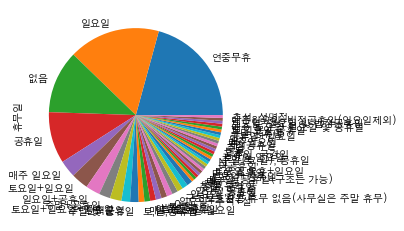

In [24]:
# 파이 그래프 표시

data = simple_df['휴무일'].value_counts()

data.plot.pie()

plt.show()

이렇게 많은 걸 파이 그래프로 그리면 지옥을 볼 수 있습니다.

# 분포 확인

데이터가 어떤 식으로 분포됐는지 히스토그램을 그려보면 알 수 있습니다.

In [25]:
# 위에서 쓴 걸 일단 해봅니다.

data = simple_df['수의사인원수'].value_counts()

pd.DataFrame(data)

,수의사인원수
1,124
0,37
2,18
3,3
5,2
21,1
20,1
7,1
6,1


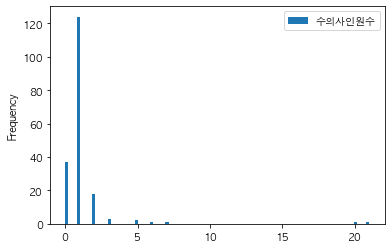

In [26]:
# 히스토그램 표시

simple_df[['수의사인원수']].plot.hist(bins=100)

plt.show()

In [27]:
# 마찬가지로 일단 value_counts부터 확인합니다.

data = simple_df['사양관리사인원수'].value_counts()

pd.DataFrame(data)

,사양관리사인원수
1,73
2,32
3,19
0,17
5,13
4,11
6,8
7,7
8,4
29,1


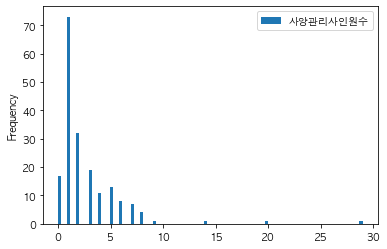

In [28]:
# 히스토그램 표시

simple_df[['사양관리사인원수']].plot.hist(bins=100)

plt.show()

## 주소 확인

주소 정보는 완전 개별적이지만 활용할 방법이 있습니다.

In [29]:
# 결측값을 제외합니다.

address_df = simple_df[simple_df['소재지도로명주소'].notnull()]

# 데이터 갯수가 어떻게 바뀌는지 확인합니다.

simple_df.shape, address_df.shape

((188, 10), (184, 10))

188 -> 184

“소재지도로명주소”에 있던 결측값 4개를 정리한 걸 알 수 있습니다.

In [30]:
# “소재지도로명주소”에 “서울”이 포함된 곳을 찾습니다.

address_df[address_df['소재지도로명주소'].str.contains('서울')]

,동물보호센터명,관리기관명,동물보호센터유형,구조대상동물,소재지도로명주소,위도,경도,휴무일,수의사인원수,사양관리사인원수
34,서초동물사랑센터,서초구청 지역경제과,법인,개,서울특별시 서초구 양재천로19길 22 (양재동),37.476332,127.038124,"매주월요일, 법정공휴일(일요일제외)",0,5
121,러브펫종합동물병원,서울특별시 관악구청,동물병원,개+고양이+기타유기동물,서울특별시 관악구 남부순환로 1451,37.481566,126.912010,연중무휴,2,5
173,강현림동물병원,서울특별시 양천구청,동물병원,반려동물,서울특별시 양천구 등촌로 160,37.543980,126.862417,매주일요일,1,2


## 지도 그리기

위도, 경도 데이터가 있기 때문에 지도에 그려볼 수 있습니다.

지도 초기값(위도, 경도, 확대)은 구글맵에서 확인해 보세요: <https://maps.google.com/>

In [31]:
# 지도 표시

Map(location=[36.5, 127.5], zoom_start=7)

In [32]:
# 위도, 경도만 모읍니다.

coordinates = simple_df[['위도', '경도']]

coordinates

,위도,경도
0,37.566196,126.719630
1,37.870072,126.983225
2,37.205577,126.807191
3,37.082177,126.817192
4,37.566196,126.719630
5,38.209944,127.217170
6,37.471967,126.629931
7,37.493777,126.537375
8,37.476764,126.633599
9,37.566426,126.719587


In [33]:
# 지도 다시 준비

map = Map(location=[36.5, 127.5], zoom_start=7)

# 지도에 위치 표시

for lat, lng in coordinates.values:
    marker = folium.Circle(
        location=[lat, lng],
        radius=5_000,
        weight=1,
        fill_color='#F00',
        fill_opacity=0.3,
    )
    marker.add_to(map)

map

In [34]:
# 지도 다시 준비

map = Map(location=[36.5, 127.5], zoom_start=7)

# 히트맵 표시

HeatMap(data=coordinates, radius=20).add_to(map)

map